# Principal Component Analysis: In-depth understanding through image visualization
Principal Component Analysis (PCA) is a popular dimensionality reduction technique used in Machine Learning applications. PCA condenses information from a large set of variables into fewer variables by applying some sort of transformation onto them. The transformation is applied in such a way that linearly correlated variables get transformed into uncorrelated variables. Correlation tells us that there is redundancy of information and if this redundancy can be reduced, then information can be compressed. For example, if there are two variables in the variable set which are highly correlated, then, we are not gaining any extra information by retaining both the variables because one can be nearly expressed as the linear combination of the other. In such cases, PCA transfers the variance of the second variable onto the first variable by translation and rotation of original axes and projecting data onto new axes. The direction of projection is determined using eigenvalues and eigenvectors. So, the first few transformed features (termed as Principal Components) are rich in information, whereas the last features contain mostly noise with negligible information in them. This transferability allows us to retain the first few principal components, thus reducing the number of variables significantly with minimal loss of information.




# 1. Import Libraries

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 2. import and standardise data

Dataset info:We use iris dataset, it is having four features and one traget column/class label

Standardization:As PCA affected by scale of the data. We can use scale function and standardise the actual values

In [65]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [85]:
Feature = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# separating features
x = df.loc[:,feature]


# separating Target/class label

y = df.loc[:,'species']

#Standardising features only on independant varaibles

x=StandardScaler().fit_transform(x)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# 3. PCA execution and Projection to 2D

In [103]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

pct=pca.fit_transform(x)

principal_df = pd.DataFrame(pct,columns=['pc1','pc2'])
principal_df

finaldf=pd.concat([principal_df,df[['species']]],axis=1)
                 

,pc1,pc2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa
...,...,...,...
145,1.870503,0.386966,virginica
146,1.564580,-0.896687,virginica
147,1.521170,0.269069,virginica
148,1.372788,1.011254,virginica


In [104]:
finaldf .head()

,pc1,pc2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


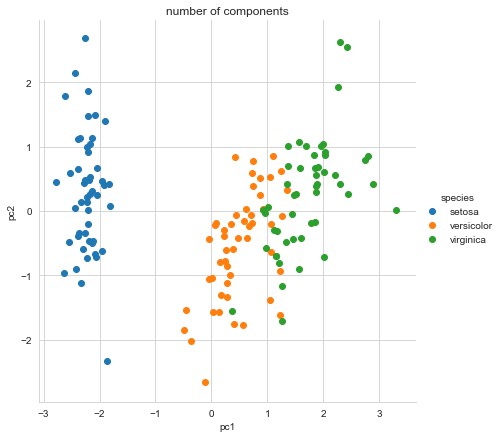

In [112]:
sns.set_style("whitegrid");
sns.FacetGrid(finaldf,hue="species",height=6) \
   .map(plt.scatter,"pc1","pc2") \
   .add_legend();
plt.title("number of components")
plt.show();



The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_varianceratio, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.

In [113]:

pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [114]:
finaldf.corr()

,pc1,pc2
pc1,1.000000e+00,6.356668e-16
pc2,6.356668e-16,1.000000e+00


In [115]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000
